A notebook for displayig a graph of models accuracy, and for running a trained model.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.


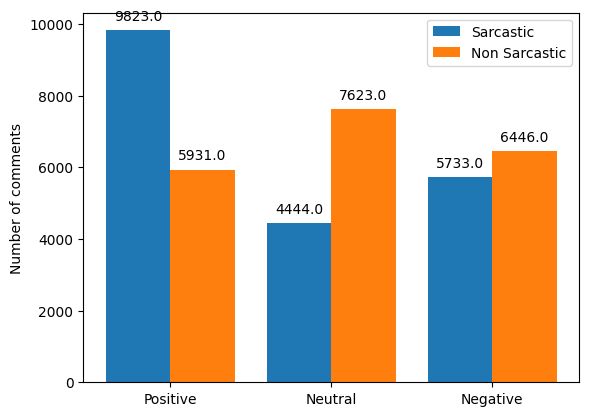

In [10]:


X = ['Positive','Neutral','Negative']
Ygirls = [9823,4444,5733]
Zboys = [5931,7623,6446]

fig,ax = plt.subplots()
X_axis = np.arange(len(X))

ax.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Sarcastic')
ax.bar(X_axis + 0.2, Zboys, 0.4, label = 'Non Sarcastic')
for x in Ygirls:

  ax.annotate(str(x),(-1.2,x+1000))
# ax.annotate(str(non_sarc_excal_count),(0.8,non_sarc_excal_count+1000))
ax.legend()
ax.set_xticks(X_axis, X)
ax.set_ylabel("Number of comments")
ax.set_label("Number of comments in each group")
add_value_labels(ax)
ax.legend()
plt.show()


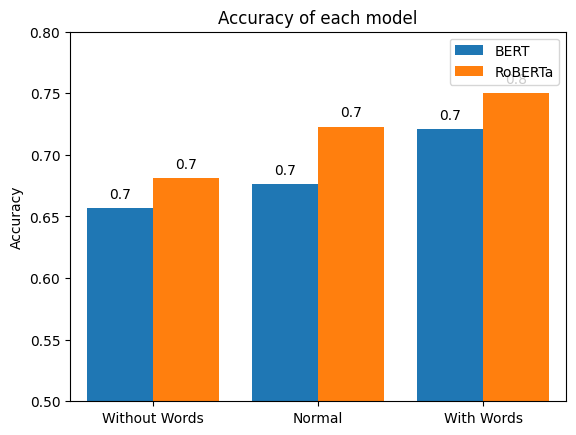

In [11]:
X = ['Without Words','Normal','With Words']
Ygirls = [0.657,0.676,0.721]
Zboys = [0.681,0.723,0.75]

X_axis = np.arange(len(X))
fig,ax = plt.subplots()

ax.axis([-0.5, 2.5, 0.5, 0.8])
ax.bar(X_axis - 0.2, Ygirls, 0.4, label = 'BERT')
ax.bar(X_axis + 0.2, Zboys, 0.4, label = 'RoBERTa')

ax.set_xticks(X_axis, X)
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy of each model")
add_value_labels(ax)

ax.legend()
plt.show()

In [ ]:
! pip install transformers
! gdown 1Gd2eQnSRcUx9NLju_Ho0WfVJqt5fU0XC
! unzip saved_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 10.9 MB/s 
     |████████████████████████████████| 101 kB 11.7 MB/s 
     |████████████████████████████████| 6.6 MB 11.2 MB/s 
     |████████████████████████████████| 596 kB 53.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Downloading...
From: https://drive.google.com/uc?id=1Gd2eQnSRcUx9NLju_Ho0WfVJqt5fU0XC
To: /content/saved_model.zip
100% 402M/402M [00:02<00:00, 148MB/s]
Archive:  saved_model.zip
  inflating: saved_model/config.json  
  inflating: saved_model/pytorch_model.bin  


In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

mymodel = pipeline(
    "text-classification",
    model= AutoModelForSequenceClassification.from_pretrained("saved_model"),
    tokenizer=AutoTokenizer.from_pretrained("bert-base-cased"))


In [ ]:
mymodel(['Kidding about the mini-bottled vodkas. I, of course, need the full-sized ones  -K',
 'that offends me how dare you.',
 'obviously notley started the fire',
 'i m totally confused and bored.. my life must change!! ',
 "it's the dudesons of course safety goes first!",
 'man fuck this kevin guy amirite? kidding',
 'Ow, how I loved the 80s  http://bit.ly/oNO85',
 'right because gay people are the ones shooting up night clubs.',
 "@karlasharks Definitely he is! I've seen his new math formulas frm yr tumblelog ",
 'that offends me how dare you. kidding'])